# MCMAC results analysis

・'age' is absolute time

・'sep.kpc' is projected distance between two clusters

・'merger' shows the clusters is pre-merger or not

・'TSC_Catalog' shows Time Since Collision from Galaxy Cluster Merger Catalog. 

 We can calculate 
 
 TTC by "(1st apocentric passage's absolute time) - (TSC at 1st apocentric passage) - (dataframe's age) "
 
and 

TSC "(dataframe's age) - { (1st apocentric passage's absolute time) - (TSC at 1st apocentric passage)}".
 
 For simple dataframe, we replaced TTC to TSC by putting minus symbol
 
・'TSC0' shows Time Since Collision from MCMAC-pre-merger and MCMAC-post-merger

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

## Mass ratio 1:1 b=0kpc

In [249]:
filename_default = '../output_default/zh_1to1_b0_z_MCMAC.txt'
filename_20degree = '../output_20degree/zh_1to1_b0_z_MCMAC.txt'

df_default = pd.read_csv(filename_default, sep='\t')
df_selected_default = df_default[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

df_20degree = pd.read_csv(filename_20degree, sep='\t')
df_selected_20degree = df_20degree[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected_default.loc[df_selected_default['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1
df_selected_20degree.loc[df_selected_20degree['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

/tmp/ipykernel_3960708/294421964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_default['Absolute Residual'] = df_selected_default['TSC0'] - df_selected_default['TSC_Catalog']
/tmp/ipykernel_3960708/294421964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_20degree['Absolute Residual'] = df_selected_20degree['TSC0'] - df_selected_20degree['TSC_Catalog']
/tmp/ipykernel_3960708/294421964.py:64: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the

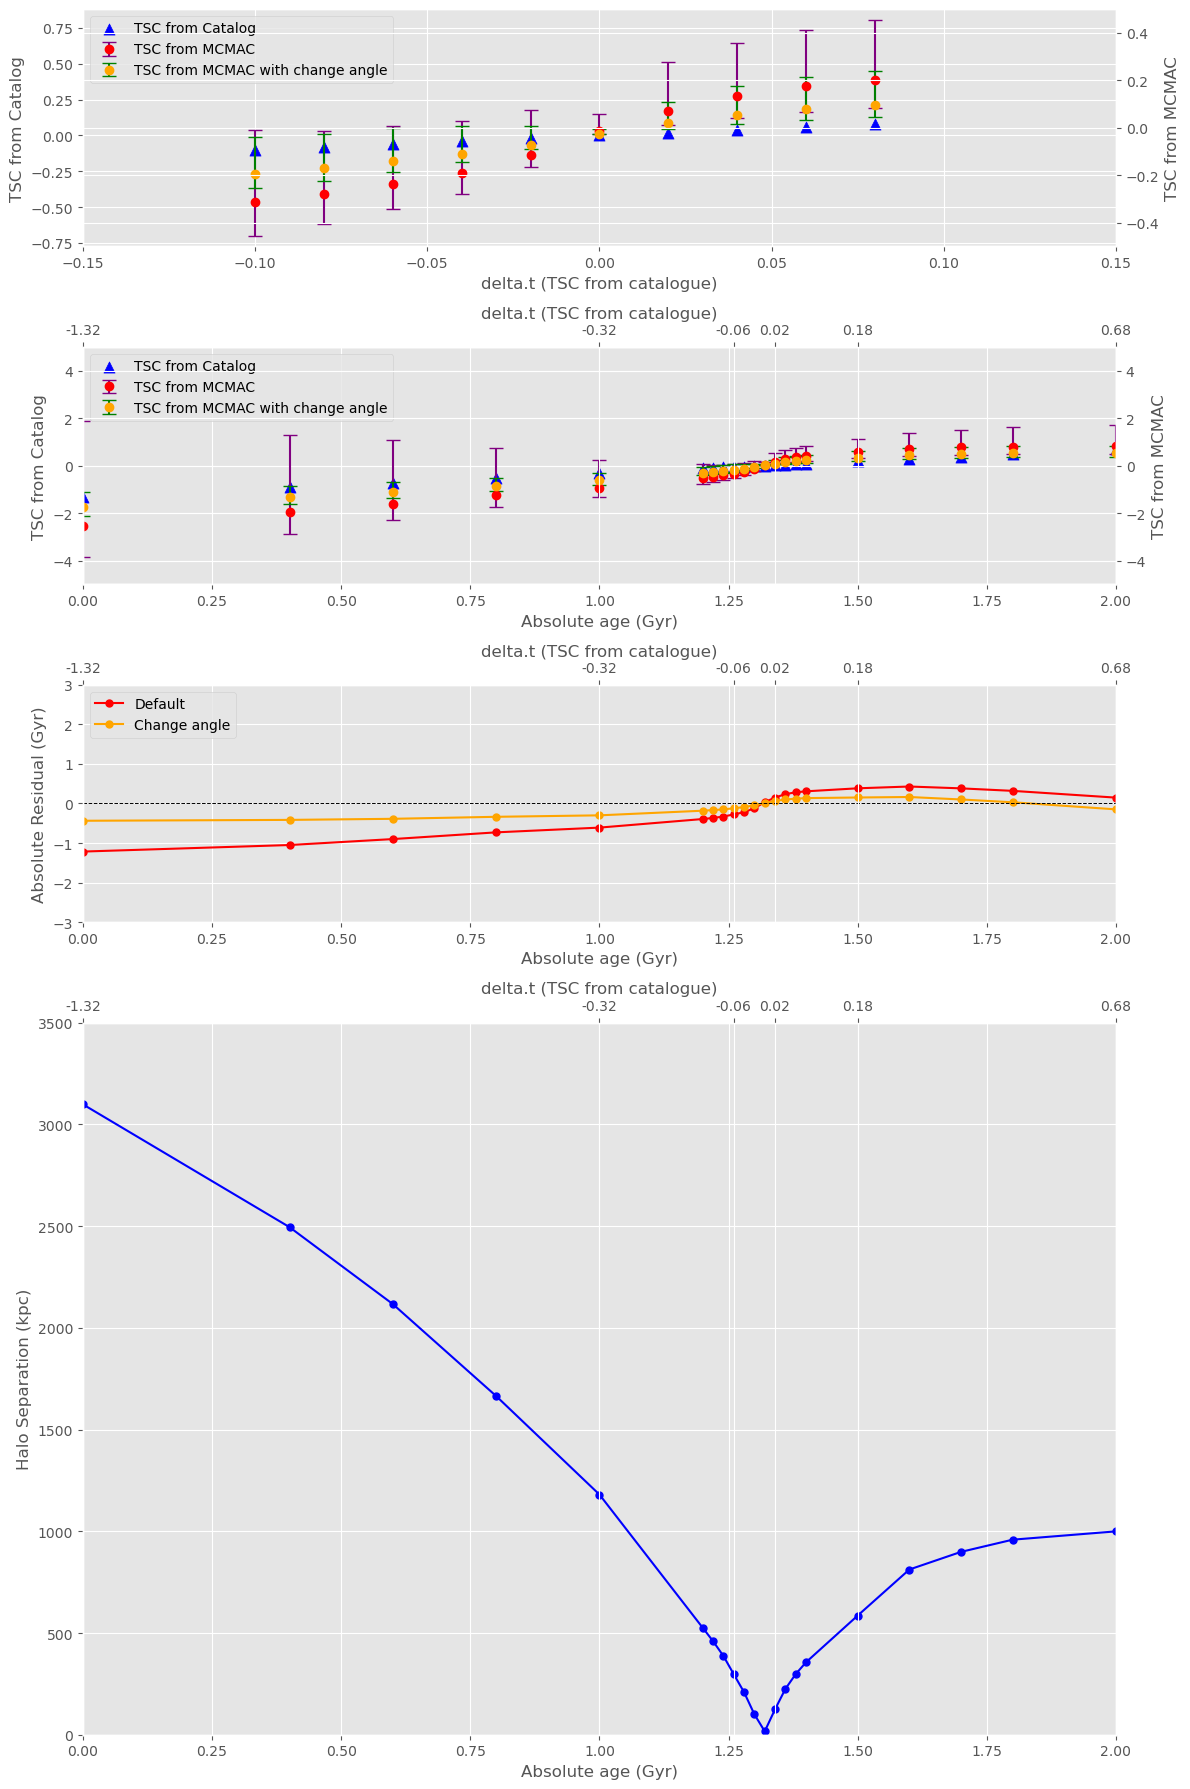

In [250]:
# 相対誤差の計算
df_selected_default['Absolute Residual'] = df_selected_default['TSC0'] - df_selected_default['TSC_Catalog']
df_selected_20degree['Absolute Residual'] = df_selected_20degree['TSC0'] - df_selected_20degree['TSC_Catalog']

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])

# delta.t の範囲でフィルタリング
df_zoomed = df_selected_default[(df_selected_default['TSC_Catalog'] >= -0.1) & (df_selected_default['TSC_Catalog'] <= 0.1)]
df_zoomed_20degree = df_selected_20degree[(df_selected_20degree['TSC_Catalog'] >= -0.1) & (df_selected_20degree['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
line_zoom3 = ax_zoom.errorbar(df_zoomed_20degree['TSC_Catalog'], df_zoomed_20degree['TSC0'], yerr=[np.abs(df_zoomed_20degree['TSC0'] - df_zoomed_20degree['TSC0.lower']), np.abs(df_zoomed_20degree['TSC0.upper'] - df_zoomed_20degree['TSC0'])], fmt='o', ecolor='green', capsize=5, markersize=6, color='orange', label='TSC from MCMAC with change angle')

ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.15, 0.15)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2, line_zoom3]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')

# 上部プロット
ax1 = fig.add_subplot(gs[1])
line1 = ax1.scatter(df_selected_default['age'], df_selected_default['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 2)
ax1.set_ylim(-5, 5)

ax2 = ax1.twinx()
line2 = ax2.errorbar(df_selected_default['age'], df_selected_default['TSC0'], yerr=[np.abs(df_selected_default['TSC0'] - df_selected_default['TSC0.lower']), np.abs(df_selected_default['TSC0.upper'] - df_selected_default['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
line3 = ax2.errorbar(df_selected_20degree['age'], df_selected_20degree['TSC0'], yerr=[np.abs(df_selected_20degree['TSC0'] - df_selected_20degree['TSC0.lower']), np.abs(df_selected_20degree['TSC0.upper'] - df_selected_20degree['TSC0'])], fmt='o', ecolor='green', capsize=5, markersize=6, color='orange', label='TSC from MCMAC with change angle')

ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax7.set_xlabel('delta.t (TSC from catalogue)')

lines = [line1, line2, line3]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
line4 = ax3.plot(df_selected_default['age'], df_selected_default['Absolute Residual'], 'r-', label='Default', marker='o', markersize=5)
line5 = ax3.plot(df_selected_20degree['age'], df_selected_20degree['Absolute Residual'], 'o-', label='Change angle', marker='o', markersize=5, color='orange')
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Absolute Residual (Gyr)')
ax3.set_xlim(0, 2)
ax3.set_ylim(-3, 3)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax6.set_xlabel('delta.t (TSC from catalogue)')

lines_mid = [line4[0], line5[0]]
labels_mid = [l.get_label() for l in lines_mid]
ax3.legend(lines_mid, labels_mid, loc='upper left')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected_default['age'], df_selected_default['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 2)
ax4.set_ylim(0, 3500)

ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()

## Mass ratio 1:1 b=500kpc

In [251]:
filename_default = '../output_default/zh_1to1_b0.5_z_MCMAC.txt'
filename_20degree = '../output_20degree/zh_1to1_b0.5_z_MCMAC.txt'

df_default = pd.read_csv(filename_default, sep='\t')
df_selected_default = df_default[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

df_20degree = pd.read_csv(filename_20degree, sep='\t')
df_selected_20degree = df_20degree[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected_default.loc[df_selected_default['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1
df_selected_20degree.loc[df_selected_20degree['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

/tmp/ipykernel_3960708/294421964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_default['Absolute Residual'] = df_selected_default['TSC0'] - df_selected_default['TSC_Catalog']
/tmp/ipykernel_3960708/294421964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_20degree['Absolute Residual'] = df_selected_20degree['TSC0'] - df_selected_20degree['TSC_Catalog']
/tmp/ipykernel_3960708/294421964.py:64: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the

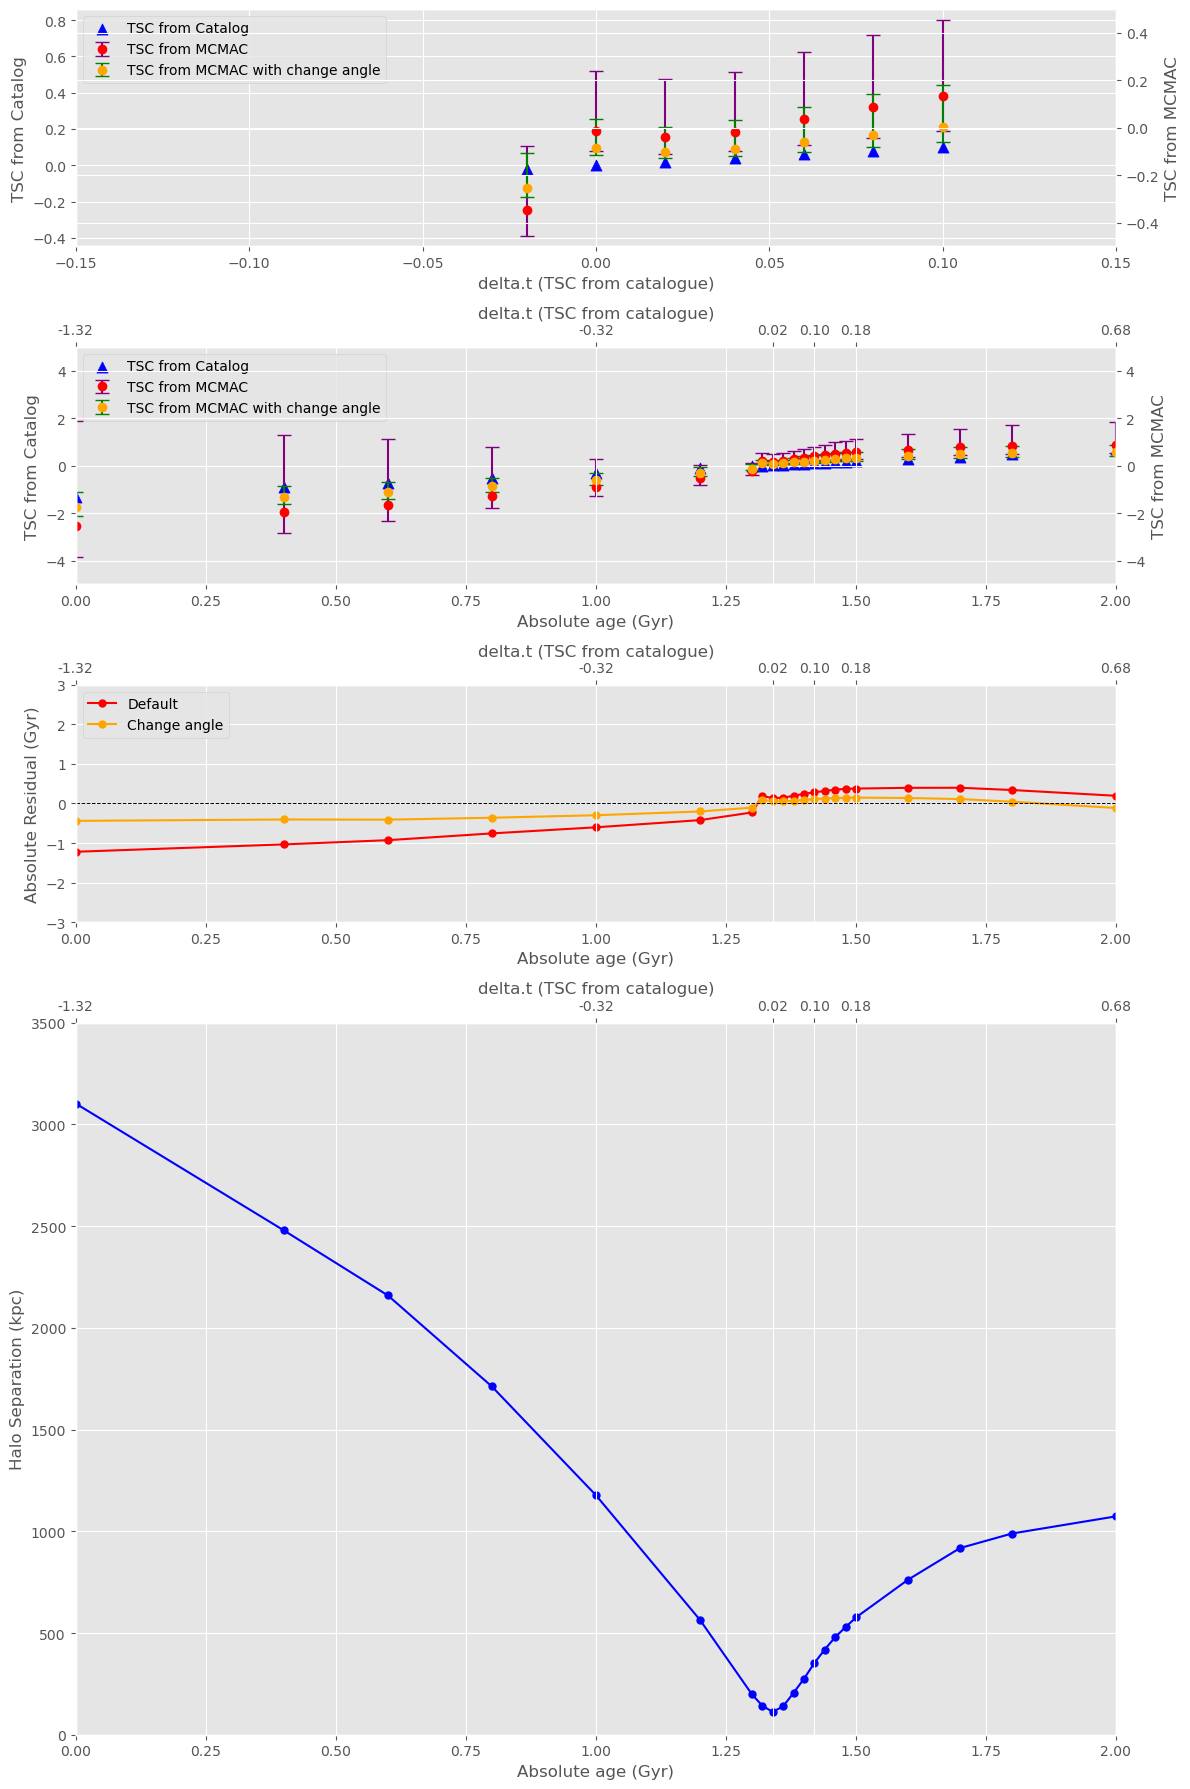

In [252]:
# 相対誤差の計算
df_selected_default['Absolute Residual'] = df_selected_default['TSC0'] - df_selected_default['TSC_Catalog']
df_selected_20degree['Absolute Residual'] = df_selected_20degree['TSC0'] - df_selected_20degree['TSC_Catalog']

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])

# delta.t の範囲でフィルタリング
df_zoomed = df_selected_default[(df_selected_default['TSC_Catalog'] >= -0.1) & (df_selected_default['TSC_Catalog'] <= 0.1)]
df_zoomed_20degree = df_selected_20degree[(df_selected_20degree['TSC_Catalog'] >= -0.1) & (df_selected_20degree['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
line_zoom3 = ax_zoom.errorbar(df_zoomed_20degree['TSC_Catalog'], df_zoomed_20degree['TSC0'], yerr=[np.abs(df_zoomed_20degree['TSC0'] - df_zoomed_20degree['TSC0.lower']), np.abs(df_zoomed_20degree['TSC0.upper'] - df_zoomed_20degree['TSC0'])], fmt='o', ecolor='green', capsize=5, markersize=6, color='orange', label='TSC from MCMAC with change angle')

ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.15, 0.15)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2, line_zoom3]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')

# 上部プロット
ax1 = fig.add_subplot(gs[1])
line1 = ax1.scatter(df_selected_default['age'], df_selected_default['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 2)
ax1.set_ylim(-5, 5)

ax2 = ax1.twinx()
line2 = ax2.errorbar(df_selected_default['age'], df_selected_default['TSC0'], yerr=[np.abs(df_selected_default['TSC0'] - df_selected_default['TSC0.lower']), np.abs(df_selected_default['TSC0.upper'] - df_selected_default['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
line3 = ax2.errorbar(df_selected_20degree['age'], df_selected_20degree['TSC0'], yerr=[np.abs(df_selected_20degree['TSC0'] - df_selected_20degree['TSC0.lower']), np.abs(df_selected_20degree['TSC0.upper'] - df_selected_20degree['TSC0'])], fmt='o', ecolor='green', capsize=5, markersize=6, color='orange', label='TSC from MCMAC with change angle')

ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax7.set_xlabel('delta.t (TSC from catalogue)')

lines = [line1, line2, line3]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
line4 = ax3.plot(df_selected_default['age'], df_selected_default['Absolute Residual'], 'r-', label='Default', marker='o', markersize=5)
line5 = ax3.plot(df_selected_20degree['age'], df_selected_20degree['Absolute Residual'], 'o-', label='Change angle', marker='o', markersize=5, color='orange')
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Absolute Residual (Gyr)')
ax3.set_xlim(0, 2)
ax3.set_ylim(-3, 3)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax6.set_xlabel('delta.t (TSC from catalogue)')

lines_mid = [line4[0], line5[0]]
labels_mid = [l.get_label() for l in lines_mid]
ax3.legend(lines_mid, labels_mid, loc='upper left')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected_default['age'], df_selected_default['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 2)
ax4.set_ylim(0, 3500)

ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()

## Mass ratio 1:1 b=1000kpc

In [253]:
filename_default = '../output_default/zh_1to1_b1_z_MCMAC.txt'
filename_20degree = '../output_20degree/zh_1to1_b1_z_MCMAC.txt'

df_default = pd.read_csv(filename_default, sep='\t')
df_selected_default = df_default[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

df_20degree = pd.read_csv(filename_20degree, sep='\t')
df_selected_20degree = df_20degree[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected_default.loc[df_selected_default['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1
df_selected_20degree.loc[df_selected_20degree['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

/tmp/ipykernel_3960708/294421964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_default['Absolute Residual'] = df_selected_default['TSC0'] - df_selected_default['TSC_Catalog']
/tmp/ipykernel_3960708/294421964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_20degree['Absolute Residual'] = df_selected_20degree['TSC0'] - df_selected_20degree['TSC_Catalog']
/tmp/ipykernel_3960708/294421964.py:64: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the

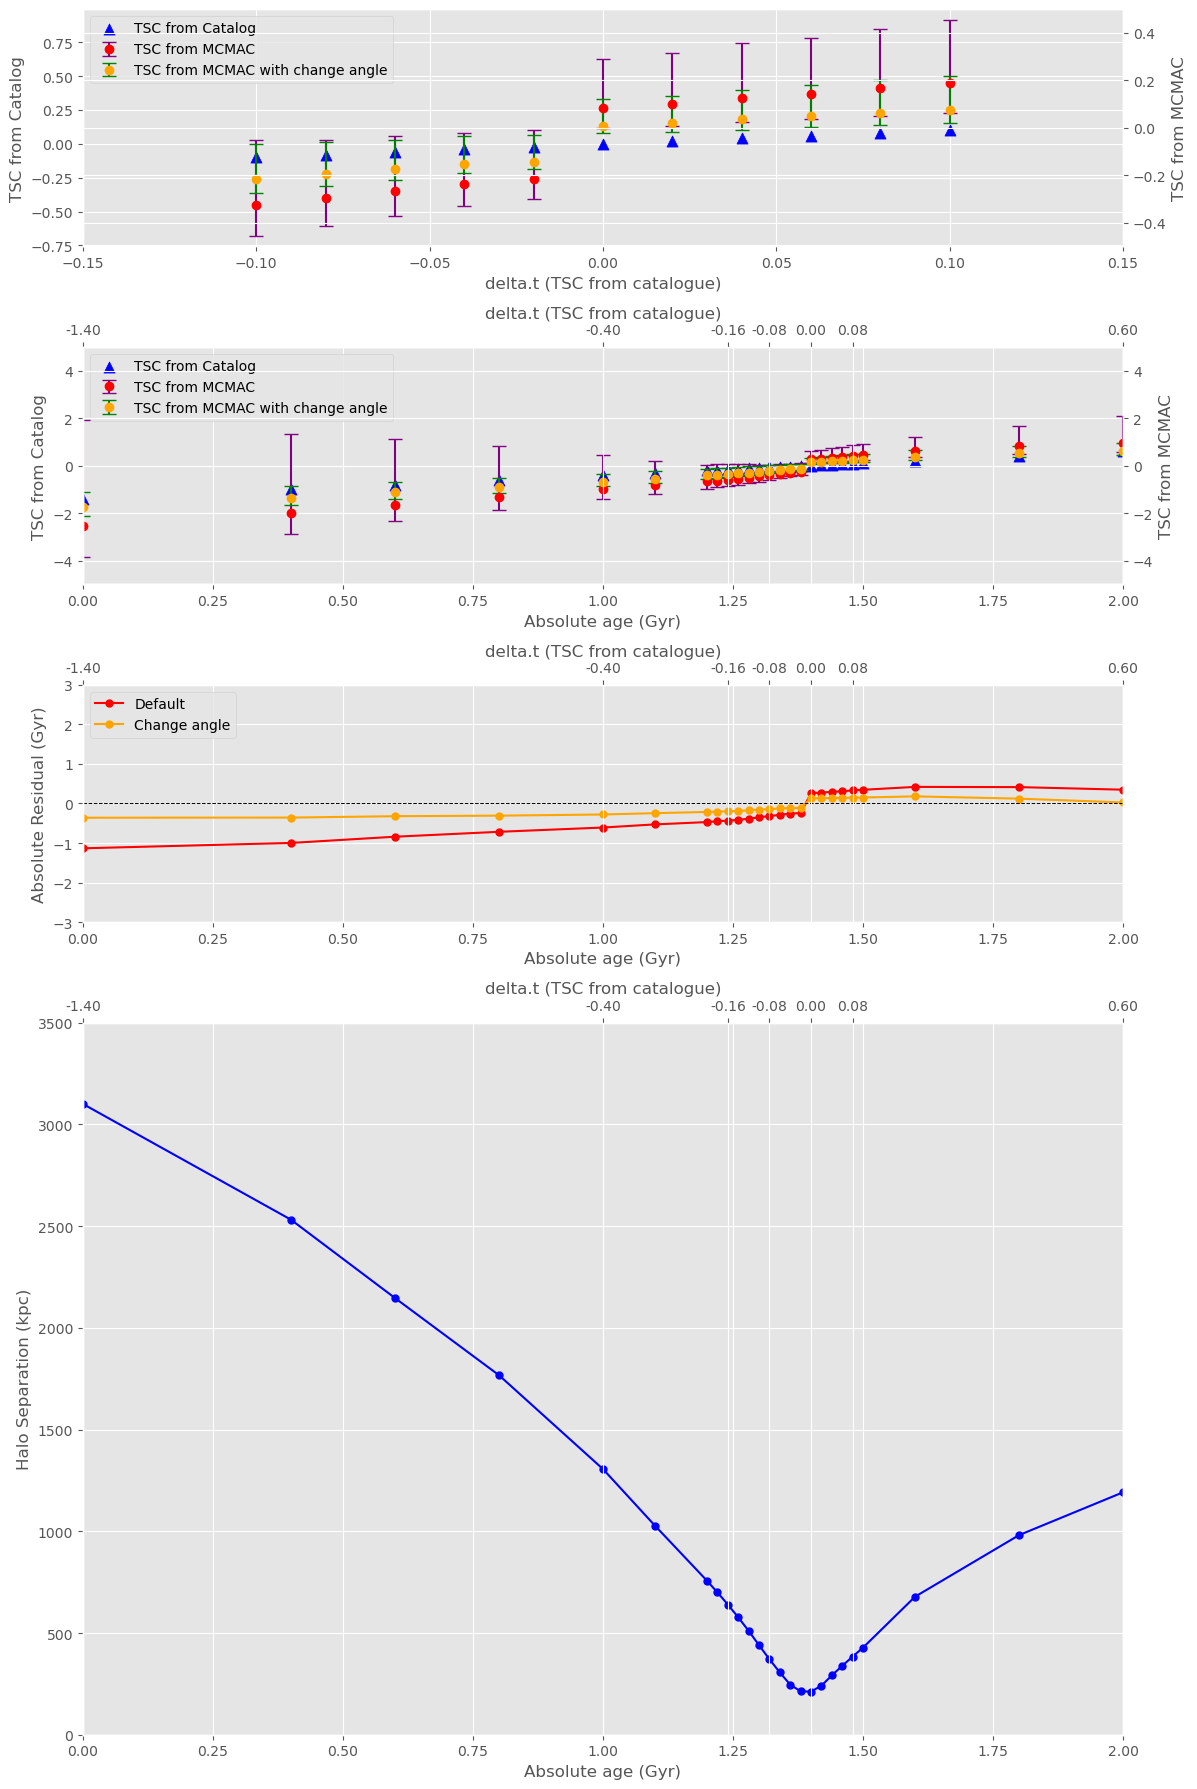

In [254]:
# 相対誤差の計算
df_selected_default['Absolute Residual'] = df_selected_default['TSC0'] - df_selected_default['TSC_Catalog']
df_selected_20degree['Absolute Residual'] = df_selected_20degree['TSC0'] - df_selected_20degree['TSC_Catalog']

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])

# delta.t の範囲でフィルタリング
df_zoomed = df_selected_default[(df_selected_default['TSC_Catalog'] >= -0.1) & (df_selected_default['TSC_Catalog'] <= 0.1)]
df_zoomed_20degree = df_selected_20degree[(df_selected_20degree['TSC_Catalog'] >= -0.1) & (df_selected_20degree['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
line_zoom3 = ax_zoom.errorbar(df_zoomed_20degree['TSC_Catalog'], df_zoomed_20degree['TSC0'], yerr=[np.abs(df_zoomed_20degree['TSC0'] - df_zoomed_20degree['TSC0.lower']), np.abs(df_zoomed_20degree['TSC0.upper'] - df_zoomed_20degree['TSC0'])], fmt='o', ecolor='green', capsize=5, markersize=6, color='orange', label='TSC from MCMAC with change angle')

ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.15, 0.15)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2, line_zoom3]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')

# 上部プロット
ax1 = fig.add_subplot(gs[1])
line1 = ax1.scatter(df_selected_default['age'], df_selected_default['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 2)
ax1.set_ylim(-5, 5)

ax2 = ax1.twinx()
line2 = ax2.errorbar(df_selected_default['age'], df_selected_default['TSC0'], yerr=[np.abs(df_selected_default['TSC0'] - df_selected_default['TSC0.lower']), np.abs(df_selected_default['TSC0.upper'] - df_selected_default['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
line3 = ax2.errorbar(df_selected_20degree['age'], df_selected_20degree['TSC0'], yerr=[np.abs(df_selected_20degree['TSC0'] - df_selected_20degree['TSC0.lower']), np.abs(df_selected_20degree['TSC0.upper'] - df_selected_20degree['TSC0'])], fmt='o', ecolor='green', capsize=5, markersize=6, color='orange', label='TSC from MCMAC with change angle')

ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax7.set_xlabel('delta.t (TSC from catalogue)')

lines = [line1, line2, line3]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
line4 = ax3.plot(df_selected_default['age'], df_selected_default['Absolute Residual'], 'r-', label='Default', marker='o', markersize=5)
line5 = ax3.plot(df_selected_20degree['age'], df_selected_20degree['Absolute Residual'], 'o-', label='Change angle', marker='o', markersize=5, color='orange')
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Absolute Residual (Gyr)')
ax3.set_xlim(0, 2)
ax3.set_ylim(-3, 3)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax6.set_xlabel('delta.t (TSC from catalogue)')

lines_mid = [line4[0], line5[0]]
labels_mid = [l.get_label() for l in lines_mid]
ax3.legend(lines_mid, labels_mid, loc='upper left')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected_default['age'], df_selected_default['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 2)
ax4.set_ylim(0, 3500)

ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()

## Mass ratio 1:3 b=0kpc

In [255]:
filename_default = '../output_default/zh_1to3_b0_z_MCMAC.txt'
filename_20degree = '../output_20degree/zh_1to3_b0_z_MCMAC.txt'

df_default = pd.read_csv(filename_default, sep='\t')
df_selected_default = df_default[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

df_20degree = pd.read_csv(filename_20degree, sep='\t')
df_selected_20degree = df_20degree[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected_default.loc[df_selected_default['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1
df_selected_20degree.loc[df_selected_20degree['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

/tmp/ipykernel_3960708/294421964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_default['Absolute Residual'] = df_selected_default['TSC0'] - df_selected_default['TSC_Catalog']
/tmp/ipykernel_3960708/294421964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_20degree['Absolute Residual'] = df_selected_20degree['TSC0'] - df_selected_20degree['TSC_Catalog']
/tmp/ipykernel_3960708/294421964.py:64: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the

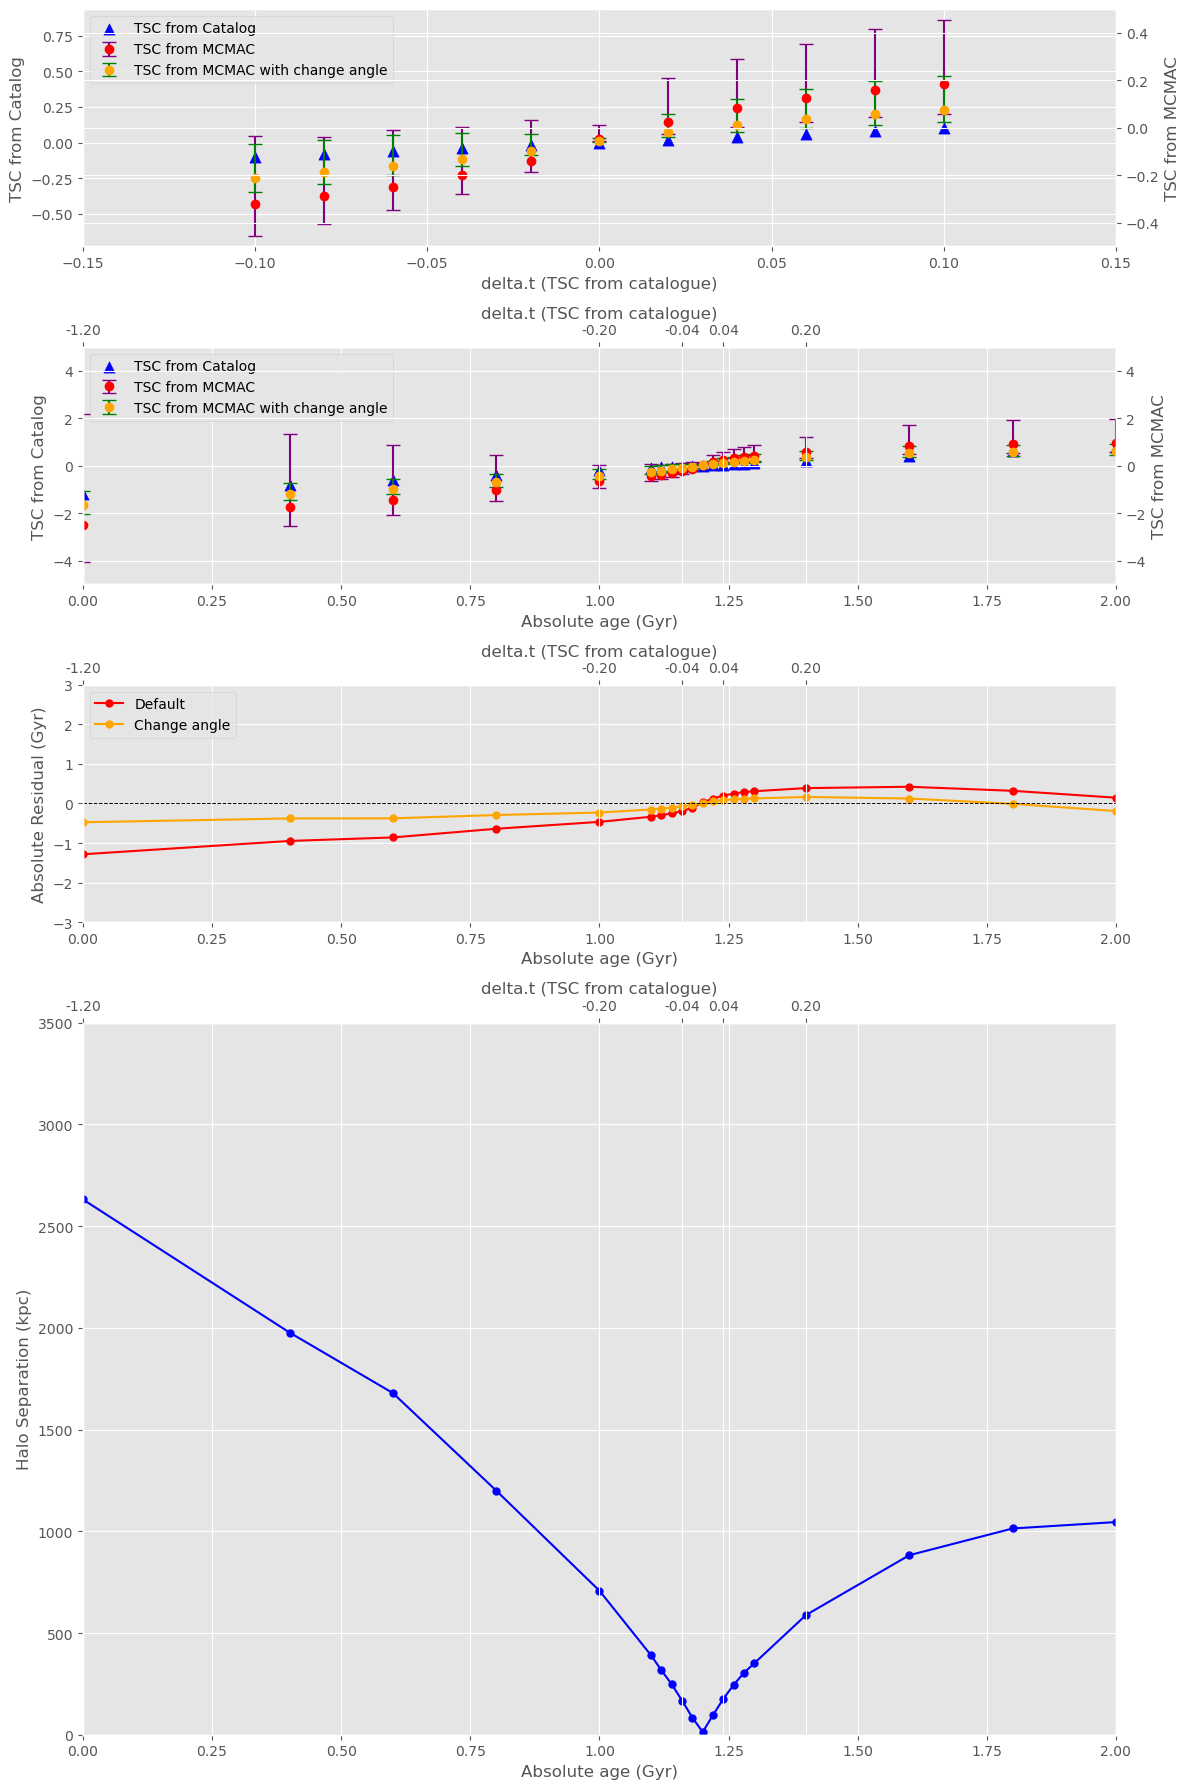

In [256]:
# 相対誤差の計算
df_selected_default['Absolute Residual'] = df_selected_default['TSC0'] - df_selected_default['TSC_Catalog']
df_selected_20degree['Absolute Residual'] = df_selected_20degree['TSC0'] - df_selected_20degree['TSC_Catalog']

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])

# delta.t の範囲でフィルタリング
df_zoomed = df_selected_default[(df_selected_default['TSC_Catalog'] >= -0.1) & (df_selected_default['TSC_Catalog'] <= 0.1)]
df_zoomed_20degree = df_selected_20degree[(df_selected_20degree['TSC_Catalog'] >= -0.1) & (df_selected_20degree['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
line_zoom3 = ax_zoom.errorbar(df_zoomed_20degree['TSC_Catalog'], df_zoomed_20degree['TSC0'], yerr=[np.abs(df_zoomed_20degree['TSC0'] - df_zoomed_20degree['TSC0.lower']), np.abs(df_zoomed_20degree['TSC0.upper'] - df_zoomed_20degree['TSC0'])], fmt='o', ecolor='green', capsize=5, markersize=6, color='orange', label='TSC from MCMAC with change angle')

ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.15, 0.15)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2, line_zoom3]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')

# 上部プロット
ax1 = fig.add_subplot(gs[1])
line1 = ax1.scatter(df_selected_default['age'], df_selected_default['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 2)
ax1.set_ylim(-5, 5)

ax2 = ax1.twinx()
line2 = ax2.errorbar(df_selected_default['age'], df_selected_default['TSC0'], yerr=[np.abs(df_selected_default['TSC0'] - df_selected_default['TSC0.lower']), np.abs(df_selected_default['TSC0.upper'] - df_selected_default['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
line3 = ax2.errorbar(df_selected_20degree['age'], df_selected_20degree['TSC0'], yerr=[np.abs(df_selected_20degree['TSC0'] - df_selected_20degree['TSC0.lower']), np.abs(df_selected_20degree['TSC0.upper'] - df_selected_20degree['TSC0'])], fmt='o', ecolor='green', capsize=5, markersize=6, color='orange', label='TSC from MCMAC with change angle')

ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax7.set_xlabel('delta.t (TSC from catalogue)')

lines = [line1, line2, line3]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
line4 = ax3.plot(df_selected_default['age'], df_selected_default['Absolute Residual'], 'r-', label='Default', marker='o', markersize=5)
line5 = ax3.plot(df_selected_20degree['age'], df_selected_20degree['Absolute Residual'], 'o-', label='Change angle', marker='o', markersize=5, color='orange')
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Absolute Residual (Gyr)')
ax3.set_xlim(0, 2)
ax3.set_ylim(-3, 3)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax6.set_xlabel('delta.t (TSC from catalogue)')

lines_mid = [line4[0], line5[0]]
labels_mid = [l.get_label() for l in lines_mid]
ax3.legend(lines_mid, labels_mid, loc='upper left')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected_default['age'], df_selected_default['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 2)
ax4.set_ylim(0, 3500)

ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()

## Mass ratio 1:3 b=500kpc

In [257]:
filename_default = '../output_default/zh_1to3_b0.5_z_MCMAC.txt'
filename_20degree = '../output_20degree/zh_1to3_b0.5_z_MCMAC.txt'

df_default = pd.read_csv(filename_default, sep='\t')
df_selected_default = df_default[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

df_20degree = pd.read_csv(filename_20degree, sep='\t')
df_selected_20degree = df_20degree[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected_default.loc[df_selected_default['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1
df_selected_20degree.loc[df_selected_20degree['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

/tmp/ipykernel_3960708/294421964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_default['Absolute Residual'] = df_selected_default['TSC0'] - df_selected_default['TSC_Catalog']
/tmp/ipykernel_3960708/294421964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_20degree['Absolute Residual'] = df_selected_20degree['TSC0'] - df_selected_20degree['TSC_Catalog']
/tmp/ipykernel_3960708/294421964.py:64: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the

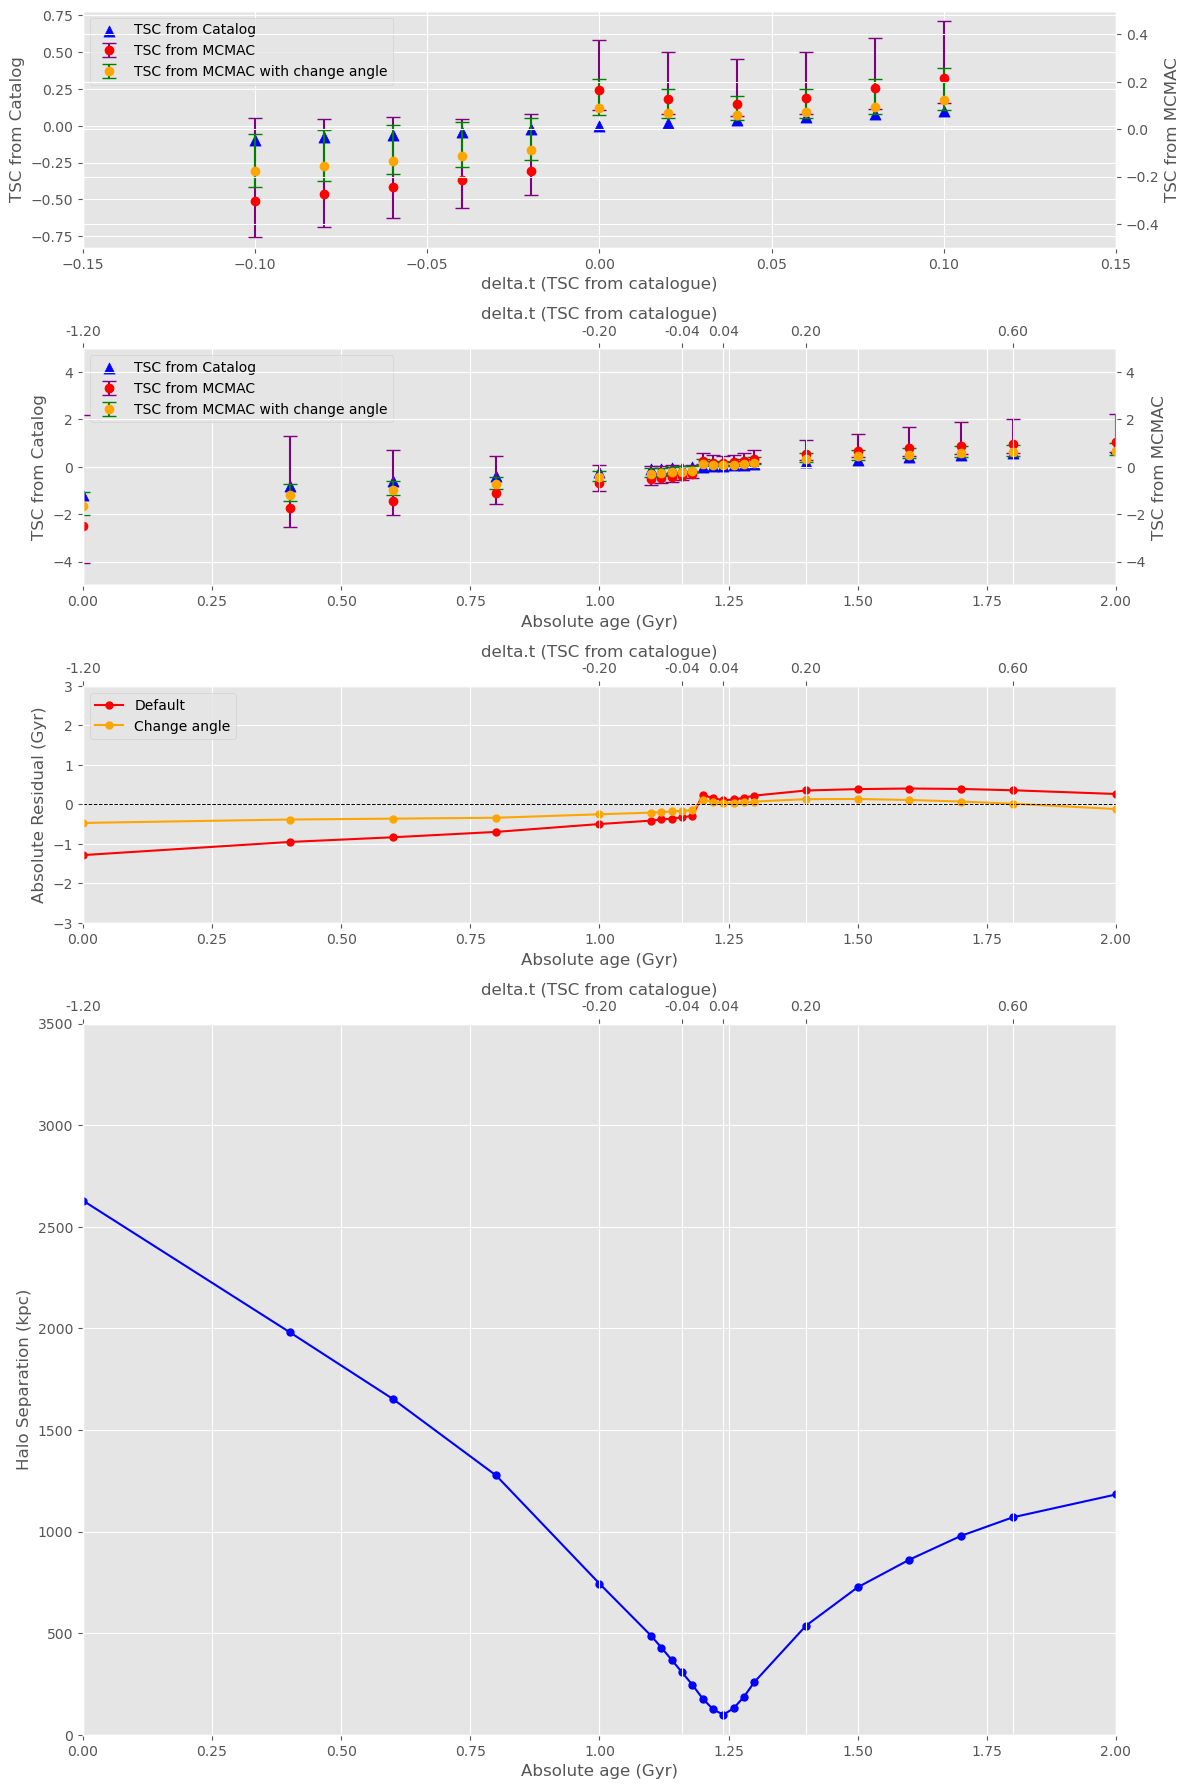

In [258]:
# 相対誤差の計算
df_selected_default['Absolute Residual'] = df_selected_default['TSC0'] - df_selected_default['TSC_Catalog']
df_selected_20degree['Absolute Residual'] = df_selected_20degree['TSC0'] - df_selected_20degree['TSC_Catalog']

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])

# delta.t の範囲でフィルタリング
df_zoomed = df_selected_default[(df_selected_default['TSC_Catalog'] >= -0.1) & (df_selected_default['TSC_Catalog'] <= 0.1)]
df_zoomed_20degree = df_selected_20degree[(df_selected_20degree['TSC_Catalog'] >= -0.1) & (df_selected_20degree['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
line_zoom3 = ax_zoom.errorbar(df_zoomed_20degree['TSC_Catalog'], df_zoomed_20degree['TSC0'], yerr=[np.abs(df_zoomed_20degree['TSC0'] - df_zoomed_20degree['TSC0.lower']), np.abs(df_zoomed_20degree['TSC0.upper'] - df_zoomed_20degree['TSC0'])], fmt='o', ecolor='green', capsize=5, markersize=6, color='orange', label='TSC from MCMAC with change angle')

ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.15, 0.15)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2, line_zoom3]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')

# 上部プロット
ax1 = fig.add_subplot(gs[1])
line1 = ax1.scatter(df_selected_default['age'], df_selected_default['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 2)
ax1.set_ylim(-5, 5)

ax2 = ax1.twinx()
line2 = ax2.errorbar(df_selected_default['age'], df_selected_default['TSC0'], yerr=[np.abs(df_selected_default['TSC0'] - df_selected_default['TSC0.lower']), np.abs(df_selected_default['TSC0.upper'] - df_selected_default['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
line3 = ax2.errorbar(df_selected_20degree['age'], df_selected_20degree['TSC0'], yerr=[np.abs(df_selected_20degree['TSC0'] - df_selected_20degree['TSC0.lower']), np.abs(df_selected_20degree['TSC0.upper'] - df_selected_20degree['TSC0'])], fmt='o', ecolor='green', capsize=5, markersize=6, color='orange', label='TSC from MCMAC with change angle')

ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax7.set_xlabel('delta.t (TSC from catalogue)')

lines = [line1, line2, line3]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
line4 = ax3.plot(df_selected_default['age'], df_selected_default['Absolute Residual'], 'r-', label='Default', marker='o', markersize=5)
line5 = ax3.plot(df_selected_20degree['age'], df_selected_20degree['Absolute Residual'], 'o-', label='Change angle', marker='o', markersize=5, color='orange')
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Absolute Residual (Gyr)')
ax3.set_xlim(0, 2)
ax3.set_ylim(-3, 3)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax6.set_xlabel('delta.t (TSC from catalogue)')

lines_mid = [line4[0], line5[0]]
labels_mid = [l.get_label() for l in lines_mid]
ax3.legend(lines_mid, labels_mid, loc='upper left')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected_default['age'], df_selected_default['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 2)
ax4.set_ylim(0, 3500)

ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()

## Mass ratio 1:3 b=1000kpc

In [259]:
filename_default = '../output_default/zh_1to3_b1_z_MCMAC.txt'
filename_20degree = '../output_20degree/zh_1to3_b1_z_MCMAC.txt'

df_default = pd.read_csv(filename_default, sep='\t')
df_selected_default = df_default[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

df_20degree = pd.read_csv(filename_20degree, sep='\t')
df_selected_20degree = df_20degree[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected_default.loc[df_selected_default['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1
df_selected_20degree.loc[df_selected_20degree['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

/tmp/ipykernel_3960708/1709920466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_default['Absolute Residual'] = df_selected_default['TSC0'] - df_selected_default['TSC_Catalog']
/tmp/ipykernel_3960708/1709920466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_20degree['Absolute Residual'] = df_selected_20degree['TSC0'] - df_selected_20degree['TSC_Catalog']
/tmp/ipykernel_3960708/1709920466.py:64: UserWarning: marker is redundantly defined by the 'marker' keyword argument and 

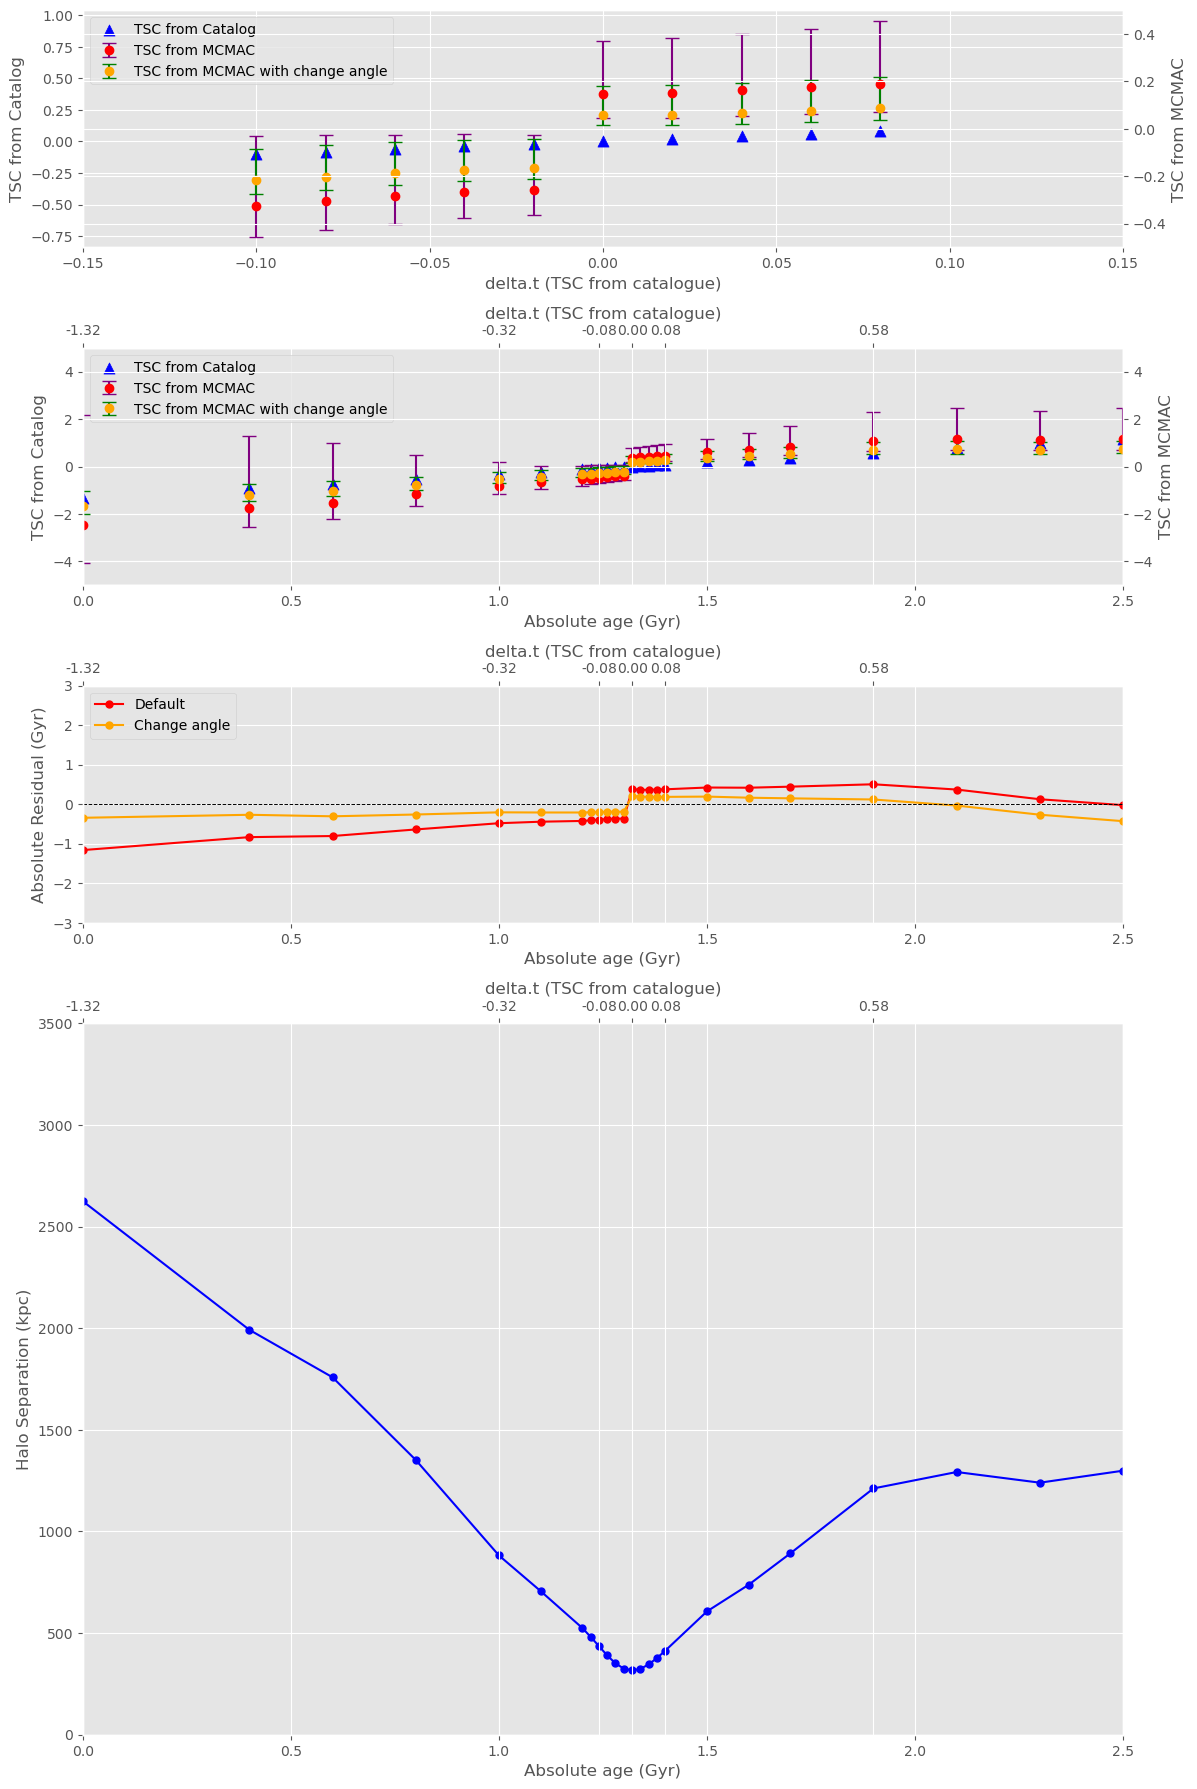

In [260]:
# 相対誤差の計算
df_selected_default['Absolute Residual'] = df_selected_default['TSC0'] - df_selected_default['TSC_Catalog']
df_selected_20degree['Absolute Residual'] = df_selected_20degree['TSC0'] - df_selected_20degree['TSC_Catalog']

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])

# delta.t の範囲でフィルタリング
df_zoomed = df_selected_default[(df_selected_default['TSC_Catalog'] >= -0.1) & (df_selected_default['TSC_Catalog'] <= 0.1)]
df_zoomed_20degree = df_selected_20degree[(df_selected_20degree['TSC_Catalog'] >= -0.1) & (df_selected_20degree['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
line_zoom3 = ax_zoom.errorbar(df_zoomed_20degree['TSC_Catalog'], df_zoomed_20degree['TSC0'], yerr=[np.abs(df_zoomed_20degree['TSC0'] - df_zoomed_20degree['TSC0.lower']), np.abs(df_zoomed_20degree['TSC0.upper'] - df_zoomed_20degree['TSC0'])], fmt='o', ecolor='green', capsize=5, markersize=6, color='orange', label='TSC from MCMAC with change angle')

ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.15, 0.15)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2, line_zoom3]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')

# 上部プロット
ax1 = fig.add_subplot(gs[1])
line1 = ax1.scatter(df_selected_default['age'], df_selected_default['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 2.5)
ax1.set_ylim(-5, 5)

ax2 = ax1.twinx()
line2 = ax2.errorbar(df_selected_default['age'], df_selected_default['TSC0'], yerr=[np.abs(df_selected_default['TSC0'] - df_selected_default['TSC0.lower']), np.abs(df_selected_default['TSC0.upper'] - df_selected_default['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
line3 = ax2.errorbar(df_selected_20degree['age'], df_selected_20degree['TSC0'], yerr=[np.abs(df_selected_20degree['TSC0'] - df_selected_20degree['TSC0.lower']), np.abs(df_selected_20degree['TSC0.upper'] - df_selected_20degree['TSC0'])], fmt='o', ecolor='green', capsize=5, markersize=6, color='orange', label='TSC from MCMAC with change angle')

ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax7.set_xlabel('delta.t (TSC from catalogue)')

lines = [line1, line2, line3]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
line4 = ax3.plot(df_selected_default['age'], df_selected_default['Absolute Residual'], 'r-', label='Default', marker='o', markersize=5)
line5 = ax3.plot(df_selected_20degree['age'], df_selected_20degree['Absolute Residual'], 'o-', label='Change angle', marker='o', markersize=5, color='orange')
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Absolute Residual (Gyr)')
ax3.set_xlim(0, 2.5)
ax3.set_ylim(-3, 3)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax6.set_xlabel('delta.t (TSC from catalogue)')

lines_mid = [line4[0], line5[0]]
labels_mid = [l.get_label() for l in lines_mid]
ax3.legend(lines_mid, labels_mid, loc='upper left')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected_default['age'], df_selected_default['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 2.5)
ax4.set_ylim(0, 3500)

ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()

## Mass ratio 1:10 b=0kpc

In [261]:
filename_default = '../output_default/zh_1to10_b0_z_MCMAC.txt'
filename_20degree = '../output_20degree/zh_1to10_b0_z_MCMAC.txt'

df_default = pd.read_csv(filename_default, sep='\t')
df_selected_default = df_default[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

df_20degree = pd.read_csv(filename_20degree, sep='\t')
df_selected_20degree = df_20degree[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected_default.loc[df_selected_default['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1
df_selected_20degree.loc[df_selected_20degree['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

/tmp/ipykernel_3960708/2059203753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_default['Absolute Residual'] = df_selected_default['TSC0'] - df_selected_default['TSC_Catalog']
/tmp/ipykernel_3960708/2059203753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_20degree['Absolute Residual'] = df_selected_20degree['TSC0'] - df_selected_20degree['TSC_Catalog']
/tmp/ipykernel_3960708/2059203753.py:64: UserWarning: marker is redundantly defined by the 'marker' keyword argument and 

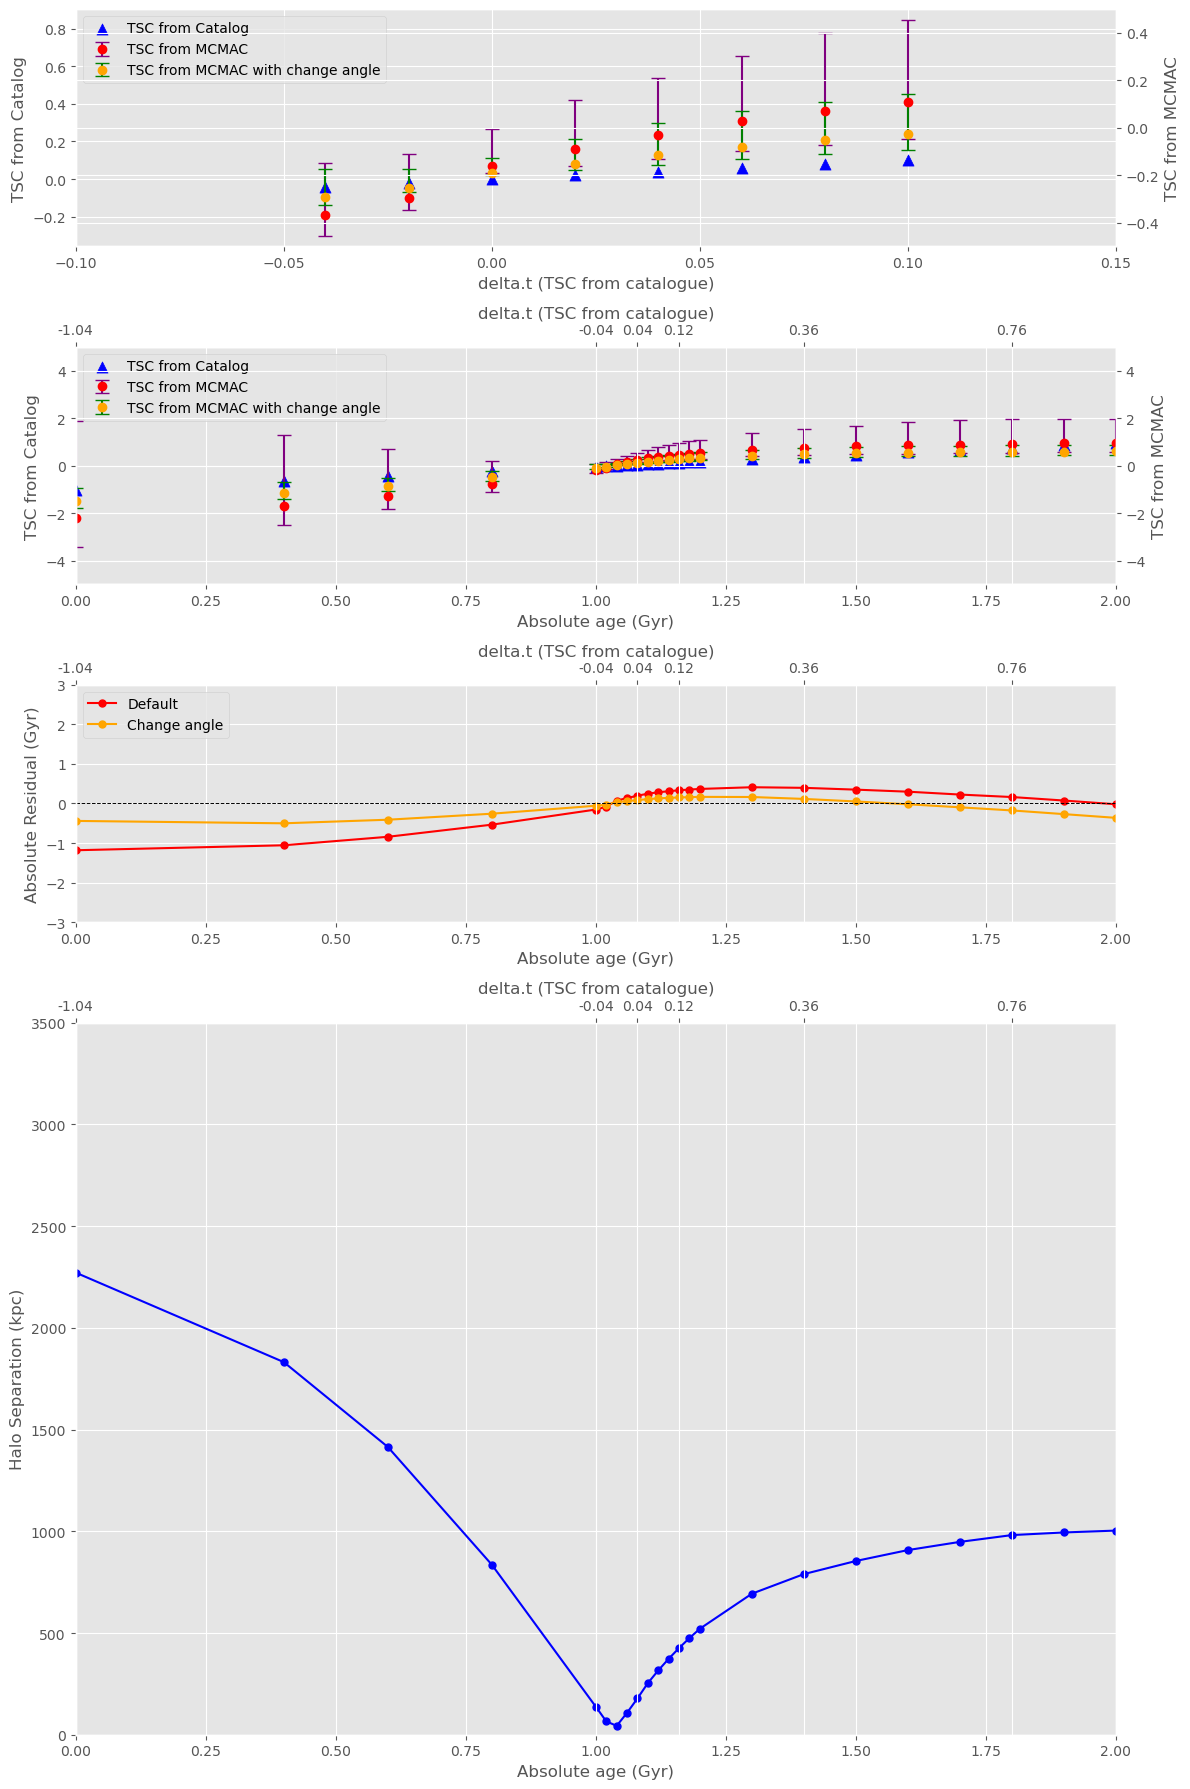

In [262]:
# 相対誤差の計算
df_selected_default['Absolute Residual'] = df_selected_default['TSC0'] - df_selected_default['TSC_Catalog']
df_selected_20degree['Absolute Residual'] = df_selected_20degree['TSC0'] - df_selected_20degree['TSC_Catalog']

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])

# delta.t の範囲でフィルタリング
df_zoomed = df_selected_default[(df_selected_default['TSC_Catalog'] >= -0.1) & (df_selected_default['TSC_Catalog'] <= 0.1)]
df_zoomed_20degree = df_selected_20degree[(df_selected_20degree['TSC_Catalog'] >= -0.1) & (df_selected_20degree['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
line_zoom3 = ax_zoom.errorbar(df_zoomed_20degree['TSC_Catalog'], df_zoomed_20degree['TSC0'], yerr=[np.abs(df_zoomed_20degree['TSC0'] - df_zoomed_20degree['TSC0.lower']), np.abs(df_zoomed_20degree['TSC0.upper'] - df_zoomed_20degree['TSC0'])], fmt='o', ecolor='green', capsize=5, markersize=6, color='orange', label='TSC from MCMAC with change angle')

ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.1, 0.15)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2, line_zoom3]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')

# 上部プロット
ax1 = fig.add_subplot(gs[1])
line1 = ax1.scatter(df_selected_default['age'], df_selected_default['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 2)
ax1.set_ylim(-5, 5)

ax2 = ax1.twinx()
line2 = ax2.errorbar(df_selected_default['age'], df_selected_default['TSC0'], yerr=[np.abs(df_selected_default['TSC0'] - df_selected_default['TSC0.lower']), np.abs(df_selected_default['TSC0.upper'] - df_selected_default['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
line3 = ax2.errorbar(df_selected_20degree['age'], df_selected_20degree['TSC0'], yerr=[np.abs(df_selected_20degree['TSC0'] - df_selected_20degree['TSC0.lower']), np.abs(df_selected_20degree['TSC0.upper'] - df_selected_20degree['TSC0'])], fmt='o', ecolor='green', capsize=5, markersize=6, color='orange', label='TSC from MCMAC with change angle')

ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax7.set_xlabel('delta.t (TSC from catalogue)')

lines = [line1, line2, line3]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
line4 = ax3.plot(df_selected_default['age'], df_selected_default['Absolute Residual'], 'r-', label='Default', marker='o', markersize=5)
line5 = ax3.plot(df_selected_20degree['age'], df_selected_20degree['Absolute Residual'], 'o-', label='Change angle', marker='o', markersize=5, color='orange')
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Absolute Residual (Gyr)')
ax3.set_xlim(0, 2)
ax3.set_ylim(-3, 3)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax6.set_xlabel('delta.t (TSC from catalogue)')

lines_mid = [line4[0], line5[0]]
labels_mid = [l.get_label() for l in lines_mid]
ax3.legend(lines_mid, labels_mid, loc='upper left')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected_default['age'], df_selected_default['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 2)
ax4.set_ylim(0, 3500)

ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()

## Mass ratio 1:10 b=500kpc

In [263]:
filename_default = '../output_default/zh_1to10_b0.5_z_MCMAC.txt'
filename_20degree = '../output_20degree/zh_1to10_b0.5_z_MCMAC.txt'

df_default = pd.read_csv(filename_default, sep='\t')
df_selected_default = df_default[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

df_20degree = pd.read_csv(filename_20degree, sep='\t')
df_selected_20degree = df_20degree[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected_default.loc[df_selected_default['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1
df_selected_20degree.loc[df_selected_20degree['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

/tmp/ipykernel_3960708/2059203753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_default['Absolute Residual'] = df_selected_default['TSC0'] - df_selected_default['TSC_Catalog']
/tmp/ipykernel_3960708/2059203753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_20degree['Absolute Residual'] = df_selected_20degree['TSC0'] - df_selected_20degree['TSC_Catalog']
/tmp/ipykernel_3960708/2059203753.py:64: UserWarning: marker is redundantly defined by the 'marker' keyword argument and 

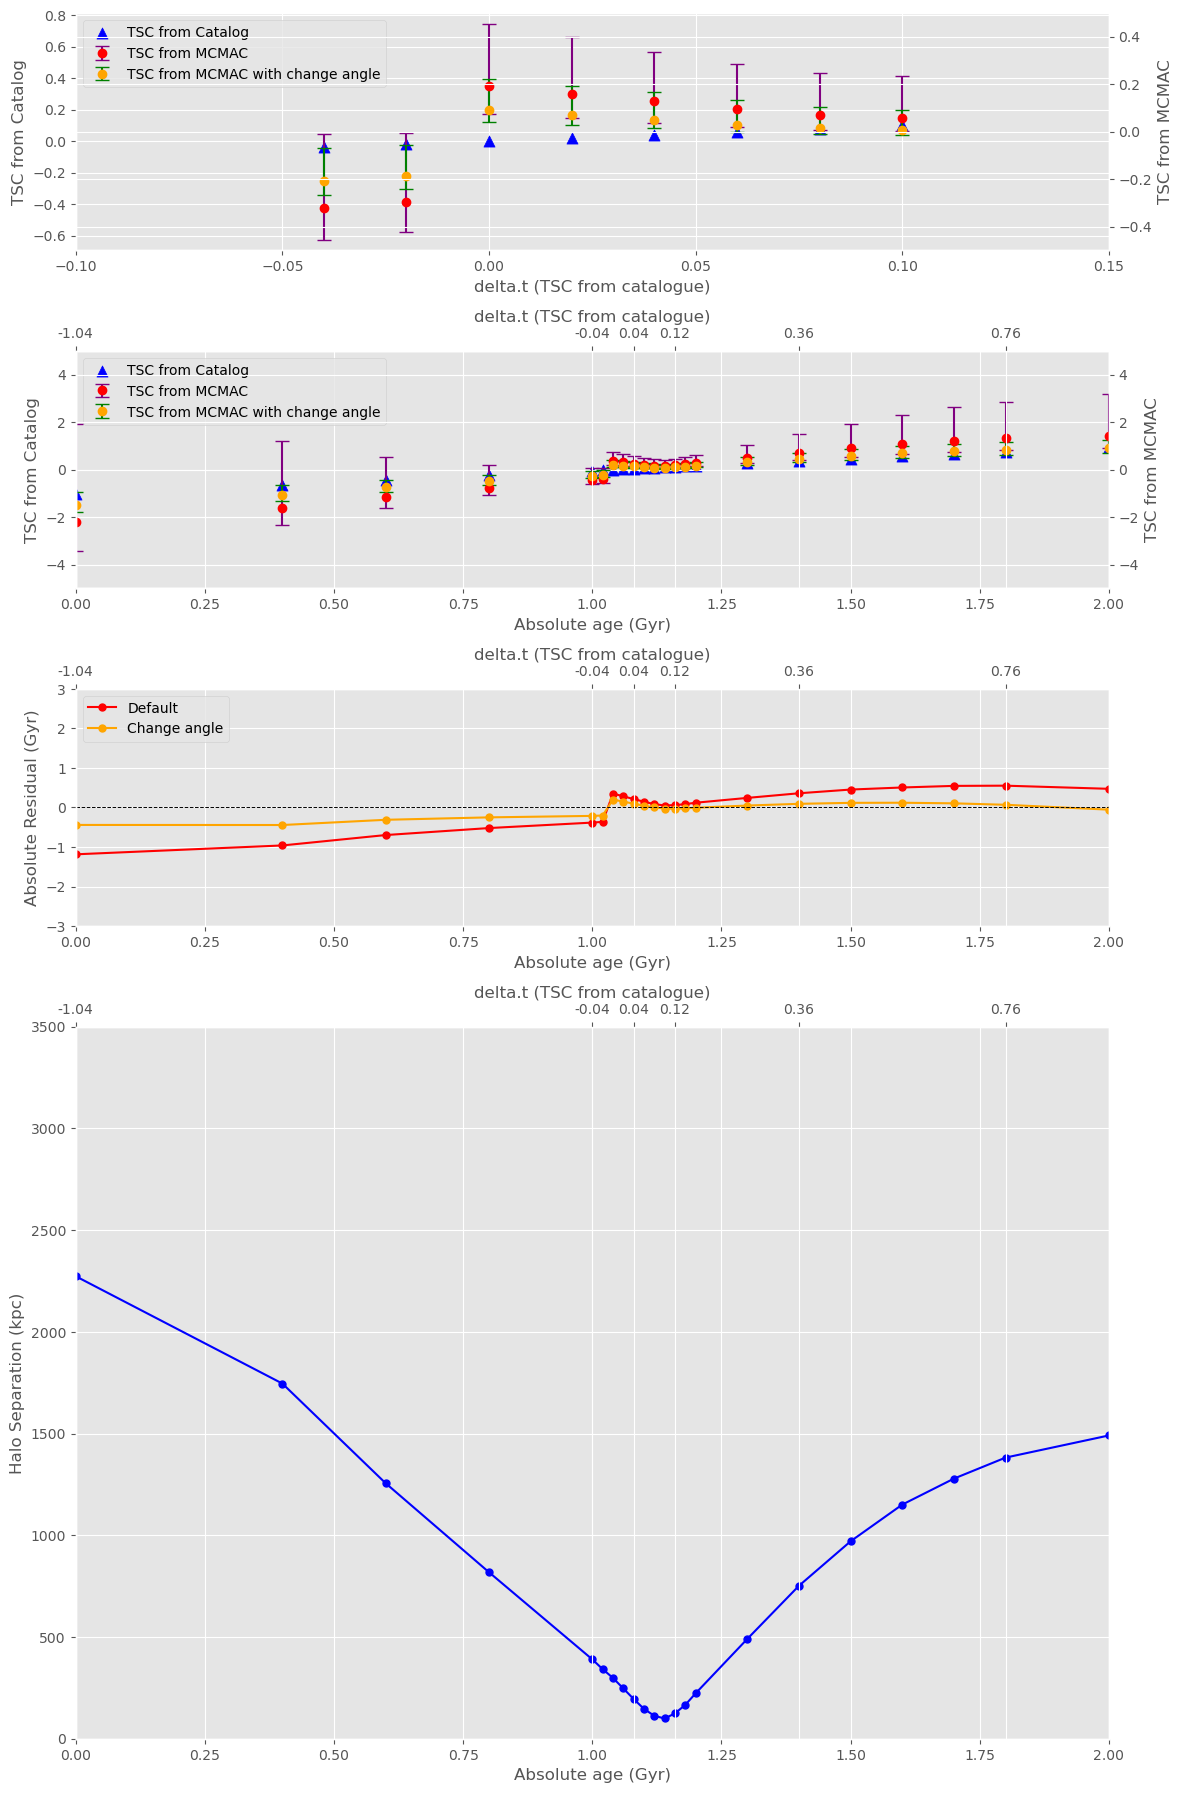

In [264]:
# 相対誤差の計算
df_selected_default['Absolute Residual'] = df_selected_default['TSC0'] - df_selected_default['TSC_Catalog']
df_selected_20degree['Absolute Residual'] = df_selected_20degree['TSC0'] - df_selected_20degree['TSC_Catalog']

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])

# delta.t の範囲でフィルタリング
df_zoomed = df_selected_default[(df_selected_default['TSC_Catalog'] >= -0.1) & (df_selected_default['TSC_Catalog'] <= 0.1)]
df_zoomed_20degree = df_selected_20degree[(df_selected_20degree['TSC_Catalog'] >= -0.1) & (df_selected_20degree['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
line_zoom3 = ax_zoom.errorbar(df_zoomed_20degree['TSC_Catalog'], df_zoomed_20degree['TSC0'], yerr=[np.abs(df_zoomed_20degree['TSC0'] - df_zoomed_20degree['TSC0.lower']), np.abs(df_zoomed_20degree['TSC0.upper'] - df_zoomed_20degree['TSC0'])], fmt='o', ecolor='green', capsize=5, markersize=6, color='orange', label='TSC from MCMAC with change angle')

ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.1, 0.15)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2, line_zoom3]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')

# 上部プロット
ax1 = fig.add_subplot(gs[1])
line1 = ax1.scatter(df_selected_default['age'], df_selected_default['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 2)
ax1.set_ylim(-5, 5)

ax2 = ax1.twinx()
line2 = ax2.errorbar(df_selected_default['age'], df_selected_default['TSC0'], yerr=[np.abs(df_selected_default['TSC0'] - df_selected_default['TSC0.lower']), np.abs(df_selected_default['TSC0.upper'] - df_selected_default['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
line3 = ax2.errorbar(df_selected_20degree['age'], df_selected_20degree['TSC0'], yerr=[np.abs(df_selected_20degree['TSC0'] - df_selected_20degree['TSC0.lower']), np.abs(df_selected_20degree['TSC0.upper'] - df_selected_20degree['TSC0'])], fmt='o', ecolor='green', capsize=5, markersize=6, color='orange', label='TSC from MCMAC with change angle')

ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax7.set_xlabel('delta.t (TSC from catalogue)')

lines = [line1, line2, line3]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
line4 = ax3.plot(df_selected_default['age'], df_selected_default['Absolute Residual'], 'r-', label='Default', marker='o', markersize=5)
line5 = ax3.plot(df_selected_20degree['age'], df_selected_20degree['Absolute Residual'], 'o-', label='Change angle', marker='o', markersize=5, color='orange')
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Absolute Residual (Gyr)')
ax3.set_xlim(0, 2)
ax3.set_ylim(-3, 3)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax6.set_xlabel('delta.t (TSC from catalogue)')

lines_mid = [line4[0], line5[0]]
labels_mid = [l.get_label() for l in lines_mid]
ax3.legend(lines_mid, labels_mid, loc='upper left')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected_default['age'], df_selected_default['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 2)
ax4.set_ylim(0, 3500)

ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()

## Mass ratio 1:10 b=1000kpc

In [265]:
filename_default = '../output_default/zh_1to10_b1_z_MCMAC.txt'
filename_20degree = '../output_20degree/zh_1to10_b1_z_MCMAC.txt'

df_default = pd.read_csv(filename_default, sep='\t')
df_selected_default = df_default[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

df_20degree = pd.read_csv(filename_20degree, sep='\t')
df_selected_20degree = df_20degree[['age','sep.kpc','merger', 'TSC_Catalog', 'TSC0', 'TSC0.lower',
       'TSC0.upper' ]]

# When we replace Time Till Collision to Time Since Collision, we need to set minus.
# We got Time Till Collision by using MCMAC-pre code.
df_selected_default.loc[df_selected_default['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1
df_selected_20degree.loc[df_selected_20degree['merger'] == 'pre', ['TSC0', 'TSC0.lower', 'TSC0.upper']] *= -1

/tmp/ipykernel_3960708/1688251353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_default['Absolute Residual'] = df_selected_default['TSC0'] - df_selected_default['TSC_Catalog']
/tmp/ipykernel_3960708/1688251353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_20degree['Absolute Residual'] = df_selected_20degree['TSC0'] - df_selected_20degree['TSC_Catalog']
/tmp/ipykernel_3960708/1688251353.py:64: UserWarning: marker is redundantly defined by the 'marker' keyword argument and 

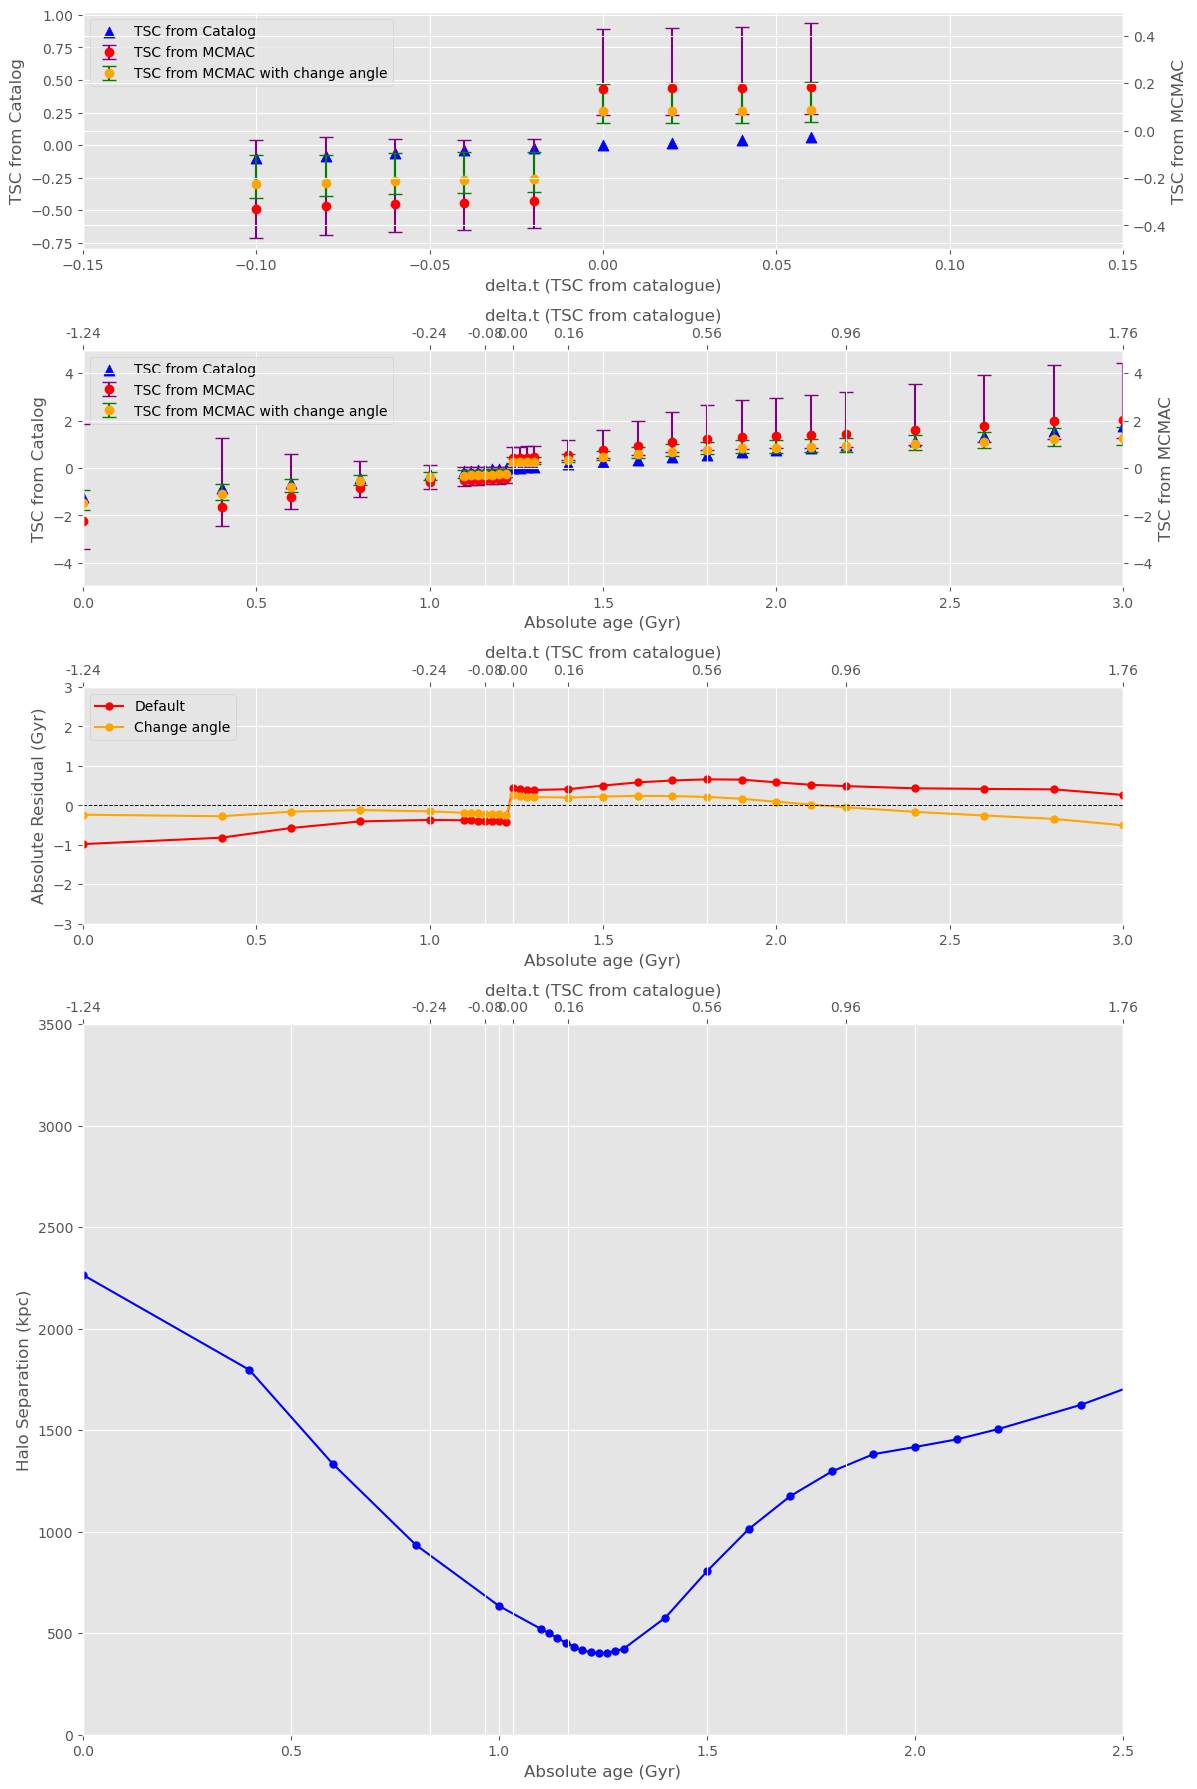

In [266]:
# 相対誤差の計算
df_selected_default['Absolute Residual'] = df_selected_default['TSC0'] - df_selected_default['TSC_Catalog']
df_selected_20degree['Absolute Residual'] = df_selected_20degree['TSC0'] - df_selected_20degree['TSC_Catalog']

# プロットスタイルの設定
plt.style.use('ggplot')

# 図とグリッドスペックの作成
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 3])

# delta.t の範囲でフィルタリング
df_zoomed = df_selected_default[(df_selected_default['TSC_Catalog'] >= -0.1) & (df_selected_default['TSC_Catalog'] <= 0.1)]
df_zoomed_20degree = df_selected_20degree[(df_selected_20degree['TSC_Catalog'] >= -0.1) & (df_selected_20degree['TSC_Catalog'] <= 0.1)]

# 最上部プロット (拡大図)
ax_zoom = fig.add_subplot(gs[0])
line_zoom1 = ax_zoom.scatter(df_zoomed['TSC_Catalog'], df_zoomed['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
line_zoom2 = ax_zoom.errorbar(df_zoomed['TSC_Catalog'], df_zoomed['TSC0'], yerr=[np.abs(df_zoomed['TSC0'] - df_zoomed['TSC0.lower']), np.abs(df_zoomed['TSC0.upper'] - df_zoomed['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
line_zoom3 = ax_zoom.errorbar(df_zoomed_20degree['TSC_Catalog'], df_zoomed_20degree['TSC0'], yerr=[np.abs(df_zoomed_20degree['TSC0'] - df_zoomed_20degree['TSC0.lower']), np.abs(df_zoomed_20degree['TSC0.upper'] - df_zoomed_20degree['TSC0'])], fmt='o', ecolor='green', capsize=5, markersize=6, color='orange', label='TSC from MCMAC with change angle')

ax_zoom.set_xlabel('delta.t (TSC from catalogue)')
ax_zoom.set_ylabel('TSC from Catalog')
ax_zoom.set_xlim(-0.15, 0.15)

# 二つ目のy軸としてTSC from MCMACを追加
ax_zoom2 = ax_zoom.twinx()
ax_zoom2.set_ylabel('TSC from MCMAC')
ax_zoom2.set_ylim(-0.5, 0.5)

lines_zoom = [line_zoom1, line_zoom2, line_zoom3]
labels_zoom = [l.get_label() for l in lines_zoom]
ax_zoom.legend(lines_zoom, labels_zoom, loc='upper left')

# 上部プロット
ax1 = fig.add_subplot(gs[1])
line1 = ax1.scatter(df_selected_default['age'], df_selected_default['TSC_Catalog'], label='TSC from Catalog', color='blue', s=64, marker='^')
ax1.set_xlabel('Absolute age (Gyr)')
ax1.set_ylabel('TSC from Catalog')
ax1.set_xlim(0, 3)
ax1.set_ylim(-5, 5)

ax2 = ax1.twinx()
line2 = ax2.errorbar(df_selected_default['age'], df_selected_default['TSC0'], yerr=[np.abs(df_selected_default['TSC0'] - df_selected_default['TSC0.lower']), np.abs(df_selected_default['TSC0.upper'] - df_selected_default['TSC0'])], fmt='o', ecolor='purple', capsize=5, markersize=6, color='red', label='TSC from MCMAC')
line3 = ax2.errorbar(df_selected_20degree['age'], df_selected_20degree['TSC0'], yerr=[np.abs(df_selected_20degree['TSC0'] - df_selected_20degree['TSC0.lower']), np.abs(df_selected_20degree['TSC0.upper'] - df_selected_20degree['TSC0'])], fmt='o', ecolor='green', capsize=5, markersize=6, color='orange', label='TSC from MCMAC with change angle')

ax2.set_ylabel('TSC from MCMAC')
ax2.set_ylim(-5, 5)

ax7 = ax1.twiny()
ax7.set_xlim(ax1.get_xlim())
ax7.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax7.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax7.set_xlabel('delta.t (TSC from catalogue)')

lines = [line1, line2, line3]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 中部プロット
ax3 = fig.add_subplot(gs[2])
line4 = ax3.plot(df_selected_default['age'], df_selected_default['Absolute Residual'], 'r-', label='Default', marker='o', markersize=5)
line5 = ax3.plot(df_selected_20degree['age'], df_selected_20degree['Absolute Residual'], 'o-', label='Change angle', marker='o', markersize=5, color='orange')
ax3.set_xlabel('Absolute age (Gyr)')
ax3.set_ylabel('Absolute Residual (Gyr)')
ax3.set_xlim(0, 3)
ax3.set_ylim(-3, 3)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.7)

ax6 = ax3.twiny()
ax6.set_xlim(ax3.get_xlim())
ax6.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax6.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax6.set_xlabel('delta.t (TSC from catalogue)')

lines_mid = [line4[0], line5[0]]
labels_mid = [l.get_label() for l in lines_mid]
ax3.legend(lines_mid, labels_mid, loc='upper left')

# 下部プロット
ax4 = fig.add_subplot(gs[3])
ax4.plot(df_selected_default['age'], df_selected_default['sep.kpc'], 'b-', label='Halo Separation', marker='o', markersize=5)
ax4.set_xlabel('Absolute age (Gyr)')
ax4.set_ylabel('Halo Separation (kpc)')
ax4.set_xlim(0, 2.5)
ax4.set_ylim(0, 3500)

ax5 = ax4.twiny()
ax5.set_xlim(ax4.get_xlim())
ax5.set_xticks(df_selected_default['age'][::4])
relative_time_labels = [f'{val:.2f}' for val in df_selected_default['TSC_Catalog'].reindex(df_selected_default.index, fill_value=0)][::4]
ax5.set_xticklabels(relative_time_labels, rotation=0, ha='center')
ax5.set_xlabel('delta.t (TSC from catalogue)')

plt.tight_layout()
plt.show()